# Imports

In [196]:
%matplotlib inline

In [588]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import Spectral
matplotlib.style.use(['seaborn-whitegrid', 'seaborn-poster'])

# Load Data

In [198]:
events_file = Path(r'athlete_events.csv')

In [199]:
events_file.exists()

True

In [200]:
Path('.').resolve()

WindowsPath('C:/Users/bnables/Documents/Python/meddle')

In [201]:
db = pd.read_csv(r'athlete_events.csv')

In [202]:
db

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


Look at list of country codes

In [203]:
db['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
       'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
       'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
       'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
       'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
       'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
       'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
       'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
       'LBR', 'SUR',

In [204]:
len(db)

271116

## Winners Club!
 - Drop those who don't deserve a chicken dinner

In [205]:
medals = db.dropna(subset=['Medal'])

In [206]:
medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [207]:
len(medals)

39783

 - When an athlete competes in a given event, there's about a 1/7 chance that athlete will win a medal.
 - Note this isn't 1/7 of Olympians are medal-winners - this is per event

In [208]:
len(medals) / len(db)

0.14673792767671404

## Gold Club

In [210]:
medals[medals['Medal'] == 'Gold']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold


## Team Sports...
 - This illustrates that there is a record per athlete-event, so multiple records for a team event
 - Team "wins" only count as a single medal for that country
 - We'll need to collapse teams to Events

In [211]:
medals[(medals['Medal'] == 'Gold') & (medals['NOC'] == 'USA') & (medals['Year'] == 2016) & (medals['Event'].str.contains("Men's Basketball"))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8167,4505,Carmelo Kyan Anthony,M,32.0,203.0,109.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
14744,7956,Harrison Bryce Jordan Barnes,M,24.0,203.0,102.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
32900,16923,Jimmy Butler III,M,26.0,201.0,99.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
45521,23497,DeMarcus Amir Cousins,M,25.0,210.0,122.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
54075,27743,DeMar Darnell DeRozan,M,26.0,201.0,99.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
60168,30807,Kevin Wayne Durant,M,27.0,206.0,105.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
77908,39561,Paul George,M,26.0,206.0,99.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
83874,42622,Draymond Jamal Green,M,26.0,200.0,104.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
103530,52383,Kyrie Andrew Irving,M,24.0,190.0,87.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
110505,55874,"Hyland DeAndre Jordan, Jr.",M,28.0,211.0,120.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold


# Basketball Height Stats
 - Because it's fun!

In [212]:
mens_basketball_heights = db[(db['Sport'] == 'Basketball') & (db['Sex'] == 'M')]['Height'] / 2.54 / 12
mens_other_heights = db[(db['Sport'] != 'Basketball') & (db['Sex'] == 'M')]['Height'] / 2.54 / 12
mens_all_heights = db[(db['Sex'] == 'M')]['Height']/ 2.54 / 12

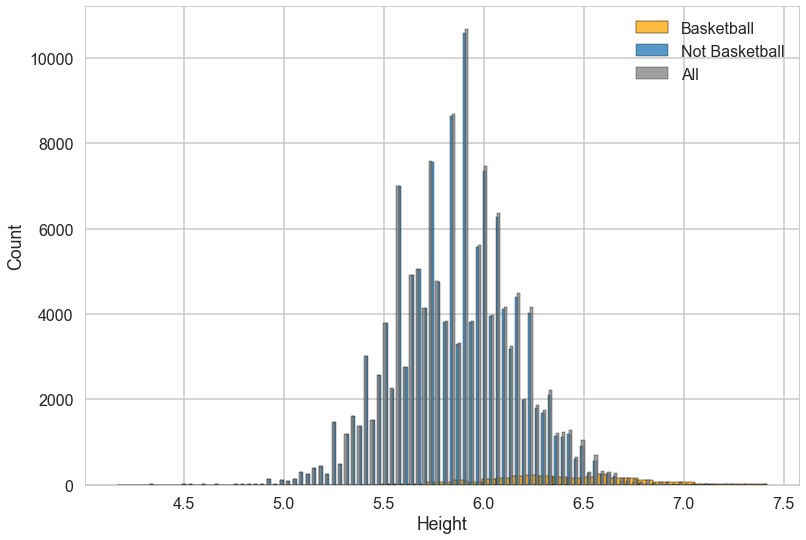

In [213]:
sns.histplot(mens_basketball_heights, label='Basketball', stat='count', color='orange')
sns.histplot(mens_other_heights, label='Not Basketball', stat='count')
sns.histplot(mens_all_heights, label='All', stat='count', color='gray')
plt.legend()

In [214]:
mens_basketball_heights = db[(db['Sport'] == 'Basketball') & (db['Sex'] == 'M') & (db['Year'] == 2016)]['Height'] / 2.54 / 12
mens_other_heights = db[(db['Sport'] != 'Basketball') & (db['Sex'] == 'M') & (db['Year'] == 2016)]['Height'] / 2.54 / 12
mens_all_heights = db[(db['Sex'] == 'M') & (db['Year'] == 2016)]['Height']/ 2.54 / 12

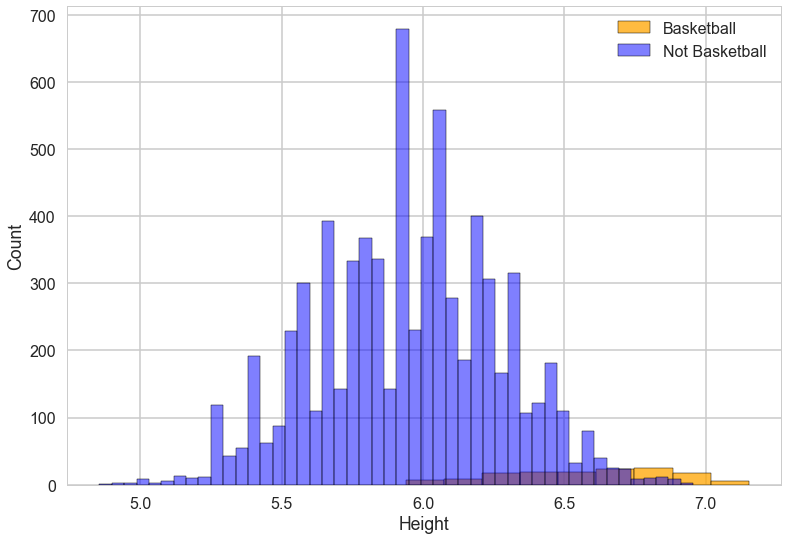

In [215]:
sns.histplot(mens_basketball_heights, label='Basketball', stat='count', color='orange')
sns.histplot(mens_other_heights, label='Not Basketball', stat='count', color='blue', alpha=0.5)
# sns.histplot(mens_all_heights, label='All', stat='count', color='gray')
plt.legend()

# Reduce by Event
 - We want each row to be an Event Medal record, not an athlete - this collapses the teams

In [216]:
events = medals.drop_duplicates(['Year', 'Event', 'Sex', 'NOC'])
len(events)

16883

In [217]:
events = medals.drop_duplicates(['Year', 'Event', 'Sex', 'NOC', 'Team', 'Games', 'Season', 'Sport', 'Medal'])
len(events)

19166

 - So for example, 6 medals were awarded for Handball in 2016. The drop_duplicates succeeded.

In [218]:
events[(events['Year'] == 2016) & (events['Sport'].str.contains('Handball'))].sort_values('Medal')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5458,3077,Ida Alstad,F,31.0,172.0,60.0,Norway,NOR,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Women's Handball,Bronze
56128,28759,Christian Dissinger,M,24.0,203.0,105.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Bronze
23362,12290,Irina Valeryevna Bliznova,F,29.0,182.0,68.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Women's Handball,Gold
41295,21299,Mads Christiansen,M,30.0,197.0,93.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
11429,6241,Camille Anas Ayglon-Saurina,F,31.0,180.0,66.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Women's Handball,Silver


 - There have been hundreds of ties over the years. For example:
 - For this reason, we have to take care that we don't consider "USA wins Gold in Event A" to be a duplicate of another "USA wins Gold in Event A"

In [219]:
events[(events['Year'] == 2016) & (events['Event'].str.contains("Men's 100 metres Butterfly"))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
46722,24093,"Lszl Cseh, Jr.",M,30.0,188.0,83.0,Hungary,HUN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Silver
134053,67496,Chad Guy Bertrand le Clos,M,24.0,190.0,83.0,South Africa,RSA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Silver
187913,94406,"Michael Fred Phelps, II",M,31.0,193.0,91.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Silver
213955,107436,Joseph Isaac Schooling,M,21.0,184.0,74.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,Gold


When I look at this list...

https://en.wikipedia.org/wiki/United_States_at_the_2016_Summer_Olympics

these are missing:
 - Men's 50 m freestyle Gold by Anthony Ervin
 - Women's 100 m hurdles Gold by Brianna Rollins
 - others
 
Figured out that it was drop_duplicates not accounting for 1 country getting multiple medals in the same event. Fixed that above, so the below now serves as verification of the fix.

In [220]:
events[(events['NOC'] == 'USA') & (events['Medal'] == 'Gold') & (events['Year'] == 2016)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1849,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold
1850,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
3020,1682,Morolake Akinosun,F,22.0,163.0,61.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold
8167,4505,Carmelo Kyan Anthony,M,32.0,203.0,109.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Gold
9417,5167,Kristin Ann Armstrong (-Savola),F,42.0,173.0,58.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Cycling,Cycling Women's Individual Time Trial,Gold
10930,5971,Seimone Delicia Augustus,F,32.0,183.0,74.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,Gold
12907,7020,Kathleen Baker,F,19.0,173.0,68.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Gold
19364,10257,"Joseph ""Gunnar"" Bentz",M,20.0,196.0,84.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
21758,11495,Simone Arianne Biles,F,19.0,143.0,47.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Individual All-Around,Gold
21759,11495,Simone Arianne Biles,F,19.0,143.0,47.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Team All-Around,Gold


If the drop_duplicates is working, all 3 tables below should show 4 entries.

In [221]:
db[(db['Year'] == 2016) & (db['Event'].str.contains('Hurdle')) & (db['Sport'] == 'Athletics') & (db['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42626,21990,Kerron Stephon Clement,M,30.0,188.0,86.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres Hurdles,Gold
155042,77819,Omar McLeod,M,22.0,180.0,NaN,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 110 metres Hurdles,Gold
165085,82900,Dalilah Muhammad,F,26.0,173.0,55.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 400 metres Hurdles,Gold
203515,102175,Brianna Rollins,F,24.0,165.0,59.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Gold


In [222]:
medals[(medals['Year'] == 2016) & (medals['Event'].str.contains('Hurdle')) & (medals['Sport'] == 'Athletics') & (medals['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42626,21990,Kerron Stephon Clement,M,30.0,188.0,86.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres Hurdles,Gold
155042,77819,Omar McLeod,M,22.0,180.0,NaN,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 110 metres Hurdles,Gold
165085,82900,Dalilah Muhammad,F,26.0,173.0,55.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 400 metres Hurdles,Gold
203515,102175,Brianna Rollins,F,24.0,165.0,59.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Gold


In [223]:
events[(events['Year'] == 2016) & (events['Event'].str.contains('Hurdle')) & (events['Sport'] == 'Athletics') & (events['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42626,21990,Kerron Stephon Clement,M,30.0,188.0,86.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres Hurdles,Gold
155042,77819,Omar McLeod,M,22.0,180.0,NaN,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 110 metres Hurdles,Gold
165085,82900,Dalilah Muhammad,F,26.0,173.0,55.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 400 metres Hurdles,Gold
203515,102175,Brianna Rollins,F,24.0,165.0,59.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Gold


Here's the example where USA swept the podium...

In [576]:
events[(events['Year'] == 2016) & (events['Event'] == "Athletics Women's 100 metres Hurdles")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4727,2695,Nia Sifaatihii Ali,F,27.0,170.0,65.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Silver
36906,18976,Kristi Castlin,F,28.0,170.0,60.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Bronze
203515,102175,Brianna Rollins,F,24.0,165.0,59.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Gold


# Defunct Countries

 - This becomes relevant in historical analysis and predicting winners since defunct countries can no longer win medals!

In [538]:
defunct = []
for noc in db.NOC.unique():
    if db[(db.Year == 2016) & (db.NOC == noc)].empty:
        defunct.append(noc)
        
defunct

['URS',
 'KUW',
 'UAR',
 'YAR',
 'EUN',
 'FRG',
 'GDR',
 'TCH',
 'AHO',
 'YMD',
 'ANZ',
 'SCG',
 'YUG',
 'MAL',
 'CRT',
 'SAA',
 'RHO',
 'BOH',
 'WIF',
 'NBO',
 'VNM',
 'UNK',
 'NFL']

In [539]:
def get_defunct(year=2016):
    defunct = []
    for noc in db.NOC.unique():
        if db[(db.Year == 2016) & (db.NOC == noc)].empty:
            defunct.append(noc)
            
    return defunct

# Medal Trends

How many medals did it take to get 3rd?

In [451]:
years = []
golds_for_3rd = []
for year in sorted(sc.Year.unique()):
    golds_4th = sc[sc.Year==year].sort_values('Gold', ascending=False).iloc[3].Gold
    years.append(year)
    golds_for_3rd.append(golds_4th + 1)

Text(0.5, 0, 'Year')

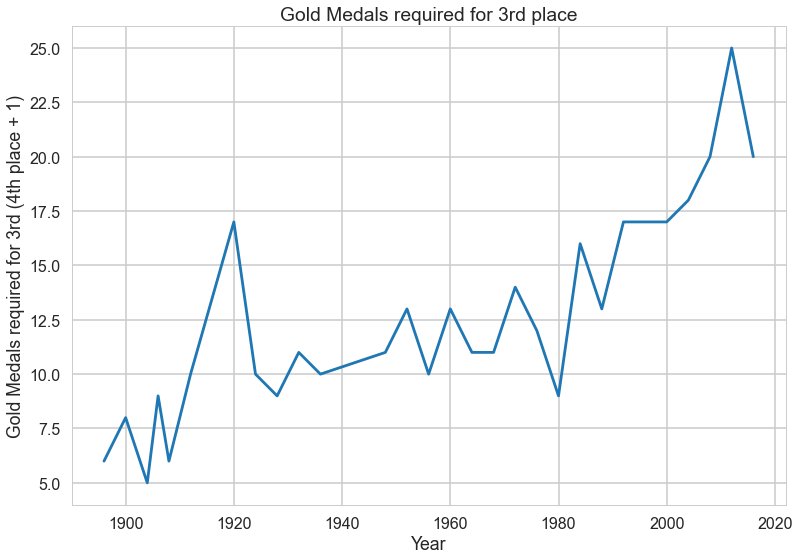

In [452]:
plt.title('Gold Medals required for 3rd place')
plt.plot(years, golds_for_3rd)
plt.ylabel('Gold Medals required for 3rd (4th place + 1)')
plt.xlabel('Year')

## Medals per Year Increases

<AxesSubplot:xlabel='Year'>

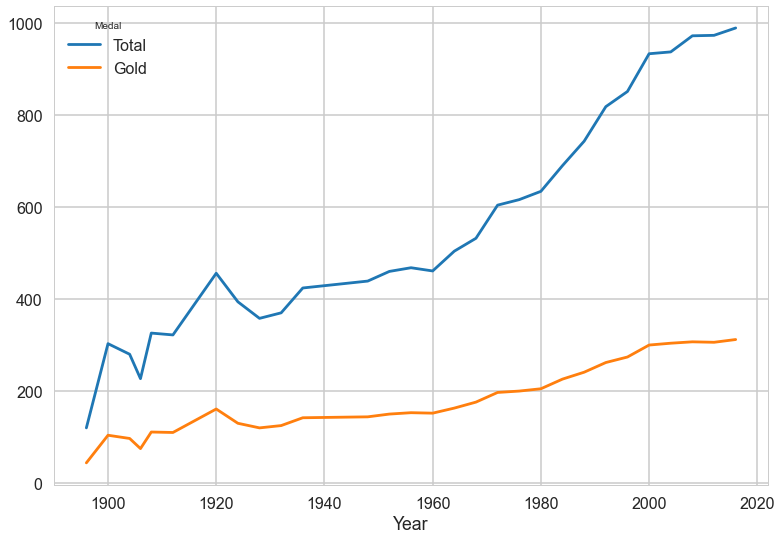

In [454]:
sc[['Year', 'Total', 'Gold']].groupby('Year').sum().plot()

## Events per Year Increases

<AxesSubplot:xlabel='Year'>

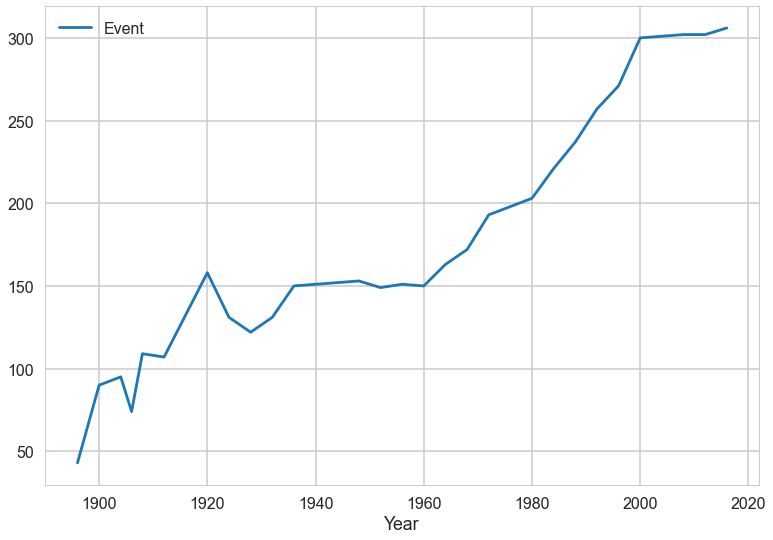

In [461]:
db[db.Season == 'Summer'][['Year', 'Event']].drop_duplicates().groupby('Year').count().plot()

# Medal Count

## Medal Count Counting

Let's make some easy to use boolean mask variables

In [225]:
usa = events['NOC'] == 'USA'
y2016 = events['Year'] == 2016
y2012 = events['Year'] == 2012
gold = events['Medal'] == 'Gold'
silver = events['Medal'] == 'Silver'
bronze = events['Medal'] == 'Bronze'

All Gold Medals

In [226]:
len(events[gold])

6283

All-time US Golds

In [227]:
len(events[usa & gold])

1140

US Golds in 2016

In [228]:
len(events[usa & gold & y2016])

47

In [229]:
countries = events['NOC'].unique()
countries

array(['DEN', 'FIN', 'NOR', 'NED', 'FRA', 'ITA', 'ESP', 'AZE', 'RUS',
       'BLR', 'CMR', 'USA', 'HUN', 'GRE', 'AUS', 'IRI', 'CAN', 'PAK',
       'URS', 'UZB', 'TJK', 'EUN', 'JPN', 'ETH', 'SUI', 'GDR', 'SWE',
       'RSA', 'TUR', 'BUL', 'EGY', 'GBR', 'JOR', 'ROU', 'PUR', 'MEX',
       'GHA', 'MAR', 'NZL', 'GER', 'ARG', 'CUB', 'URU', 'POL', 'TCH',
       'NGR', 'BRA', 'AUT', 'LTU', 'INA', 'CHI', 'UKR', 'UGA', 'SYR',
       'QAT', 'KUW', 'IOA', 'KSA', 'UAE', 'CRO', 'FRG', 'ARM', 'SRB',
       'NIG', 'IND', 'BEL', 'ALG', 'JAM', 'TTO', 'COL', 'LUX', 'BOT',
       'TUN', 'KOR', 'PRK', 'CHN', 'YUG', 'GUY', 'ISR', 'KAZ', 'GEO',
       'KEN', 'ISL', 'HAI', 'MAS', 'IRQ', 'CZE', 'SVK', 'BAH', 'ANZ',
       'PAR', 'MNE', 'IRL', 'POR', 'GUA', 'SCG', 'TAN', 'LIB', 'KGZ',
       'LAT', 'AHO', 'VEN', 'THA', 'TOG', 'PER', 'EST', 'SLO', 'NEP',
       'TPE', 'ZIM', 'MGL', 'MDA', 'CIV', 'FIJ', 'SEN', 'DOM', 'PHI',
       'UAR', 'SGP', 'NAM', 'LIE', 'WIF', 'BOH', 'BER', 'VIE', 'ISV',
       'MKD', 'SUD',

 - This bit of magic came from here: https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas

In [578]:
counts_indexed = events[['Year', 'Season', 'NOC', 'Medal']].groupby(['Year', 'Season', 'NOC', 'Medal']).size().unstack(fill_value=0)

In [579]:
counts_indexed

Medal            Bronze  Gold  Silver
Year Season NOC                      
1896 Summer AUS       1     2       0
            AUT       2     2       1
            DEN       3     1       2
            FRA       2     5       4
            GBR       3     3       3
...                 ...   ...     ...
2016 Summer UKR       4     2       5
            USA      39    47      39
            UZB       7     4       2
            VEN       2     0       1
            VIE       0     1       1

[1657 rows x 3 columns]

In [580]:
counts_indexed.loc[2016, 'Summer', 'USA']

Medal
Bronze    39
Gold      47
Silver    39
Name: (2016, Summer, USA), dtype: int64

In [581]:
counts = counts_indexed.reset_index()

In [582]:
counts

Medal,Year,Season,NOC,Bronze,Gold,Silver
0,1896,Summer,AUS,1,2,0
1,1896,Summer,AUT,2,2,1
2,1896,Summer,DEN,3,1,2
3,1896,Summer,FRA,2,5,4
4,1896,Summer,GBR,3,3,3
...,...,...,...,...,...,...
1652,2016,Summer,UKR,4,2,5
1653,2016,Summer,USA,39,47,39
1654,2016,Summer,UZB,7,4,2
1655,2016,Summer,VEN,2,0,1


In [584]:
counts['Total'] = counts['Gold'] + counts['Silver'] + counts['Bronze']
counts['Score'] = 3*counts['Gold'] + 2*counts['Silver'] + counts['Bronze']

## Medal Count Plots

<AxesSubplot:xlabel='Year', ylabel='Gold'>

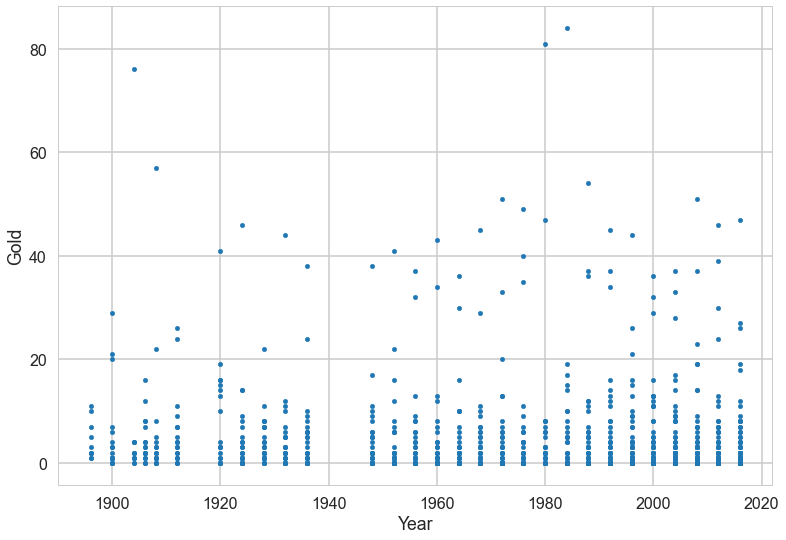

In [385]:
counts[counts.Season=='Summer'].plot.scatter('Year', 'Gold')

In [386]:
# summer counts
sc = counts[counts.Season == 'Summer'].copy()

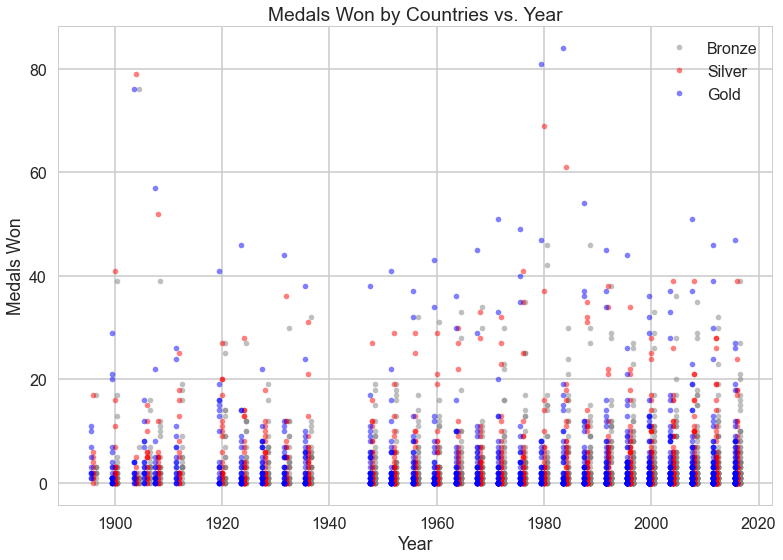

In [387]:
plt.plot(sc.Year+0.5, sc.Bronze, '.', alpha=0.5, label='Bronze', color='gray')
plt.plot(sc.Year, sc.Silver, '.', alpha=0.5, label='Silver', color='red')
plt.plot(sc.Year-0.5, sc.Gold, '.', alpha=0.5, label='Gold', color='blue')

plt.title('Medals Won by Countries vs. Year')
plt.ylabel('Medals Won')
plt.xlabel('Year')
plt.legend()

# Host Advantage

 - Trying to incorporate host city information into the dataset for possible use in modeling
 - It's notable that host advantage has rarely impacted 3rd place, except with Great Britain in 2012
 - With powerhouse countries, being host has often meant victory, like with US, China, Russia/USSR
 - With lesser countries, being host might provide a boost, but rarely enough to put a non-top-5 country in the top 5
 - Public Media predicts that Japan might pull a Great Britain and snag 3rd, however

In [388]:
cities = db[db.Season=='Summer'][['City', 'Year']].drop_duplicates().set_index('Year').sort_index()
# See https://en.wikipedia.org/wiki/1956_Summer_Olympics - 1956 occured in 2 cities 🙄
cities = cities.drop(index=1956)
cities.loc[1956] = 'Melbourne'
cities = cities.sort_index()
cities

,City
Year,
1896,Athina
1900,Paris
1904,St. Louis
1906,Athina
1908,London
1912,Stockholm
1920,Antwerpen
1924,Paris
1928,Amsterdam


In [389]:
teams = db[['Team', 'NOC']].drop_duplicates().set_index('Team').sort_index()
teams.head()

,NOC
Team,
30. Februar,AUT
A North American Team,MEX
A North American Team,USA
Acipactli,MEX
Acturus,ARG


In [390]:
db[db.Team.str.contains('Union') & (db.Year > 1950)][['Team', 'NOC']].drop_duplicates()

,Team,NOC
192,Soviet Union,URS
4366,Soviet Union-2,URS
4395,Soviet Union-1,URS
7992,Soviet Union-3,URS


In [391]:
city_noc = {'Rio de Janeiro': 'BRA',
            'London': 'GBR',
            'Beijing': 'CHN',
            'Athina': 'GRE',
            'Sydney': 'AUS',
            'Atlanta': 'USA',
            'Barcelona': 'ESP',
            'Seoul': 'KOR',
            'Los Angelos': 'USA',
            'Moskva': 'URS',
            'Montreal': 'CAN',
            'Munich': 'GER',
            'Mexico City': 'MEX',
            'Tokyo': 'JPN'}

In [392]:
cities.City[1896]

'Athina'

In [393]:
def get_host(year):
    city = cities.City[year]
    try:
        hostnoc = city_noc.get(city, '')
    except TypeError as e:
        print(city)
        print(type(city))
        print(year)
        hostnoc = ''
        
    return hostnoc

In [585]:
db[(db.Year == 1956) & (db.Season == 'Summer')]['City'].drop_duplicates()

128     Melbourne
6194    Stockholm
Name: City, dtype: object

In [395]:
hosts = []
for i, row in sc.iterrows():
    year = row['Year']
    host = get_host(year)
    hosts.append(host)

In [396]:
sc['Host'] = hosts

In [397]:
sc['HomeField'] = sc['NOC'] == sc['Host']

In [398]:
sc

Medal,Year,Season,NOC,Bronze,Gold,Silver,Total,Score,Host,HomeField
0,1896,Summer,AUS,1,2,0,3,7,GRE,False
1,1896,Summer,AUT,2,2,1,5,10,GRE,False
2,1896,Summer,DEN,3,1,2,6,10,GRE,False
3,1896,Summer,FRA,2,5,4,11,25,GRE,False
4,1896,Summer,GBR,3,3,3,9,18,GRE,False
...,...,...,...,...,...,...,...,...,...,...
1652,2016,Summer,UKR,4,2,5,11,20,BRA,False
1653,2016,Summer,USA,39,47,39,125,258,BRA,False
1654,2016,Summer,UZB,7,4,2,13,23,BRA,False
1655,2016,Summer,VEN,2,0,1,3,4,BRA,False


Plot shows in which years the host won

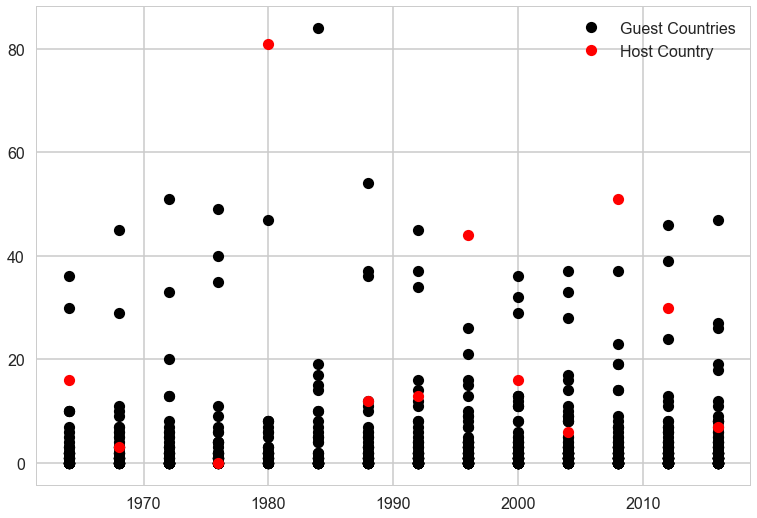

In [399]:
plt.plot(sc[(sc.Year > 1960) & (~sc.HomeField.values)].Year, sc[(sc.Year > 1960) & (~sc.HomeField.values)].Gold, 'o', color='black', label='Guest Countries')
plt.plot(sc[(sc.Year > 1960) & (sc.HomeField.values)].Year, sc[(sc.Year > 1960) & (sc.HomeField.values)].Gold, 'o', color='red', label='Host Country')
plt.legend()

# Medal Winners

In [400]:
sc[sc.Year==2012]

Medal,Year,Season,NOC,Bronze,Gold,Silver,Total,Score,Host,HomeField
1460,2012,Summer,AFG,1,0,0,1,1,GBR,False
1461,2012,Summer,ALG,0,1,0,1,3,GBR,False
1462,2012,Summer,ARG,2,1,1,4,7,GBR,False
1463,2012,Summer,ARM,2,0,1,3,4,GBR,False
1464,2012,Summer,AUS,12,7,16,35,65,GBR,False
...,...,...,...,...,...,...,...,...,...,...
1540,2012,Summer,UGA,0,1,0,1,3,GBR,False
1541,2012,Summer,UKR,9,6,5,20,37,GBR,False
1542,2012,Summer,USA,30,46,28,104,224,GBR,False
1543,2012,Summer,UZB,2,1,0,3,5,GBR,False


Winners for a given year...

In [401]:
sc[sc.Year==2012].sort_values('Gold', ascending=False).head(10)

Medal,Year,Season,NOC,Bronze,Gold,Silver,Total,Score,Host,HomeField
1542,2012,Summer,USA,30,46,28,104,224,GBR,False
1474,2012,Summer,CHN,23,39,28,90,196,GBR,False
1489,2012,Summer,GBR,19,30,19,68,147,GBR,True
1527,2012,Summer,RUS,32,24,26,82,156,GBR,False
1506,2012,Summer,KOR,7,13,8,28,62,GBR,False
1491,2012,Summer,GER,14,12,19,45,88,GBR,False
1487,2012,Summer,FRA,13,11,11,35,68,GBR,False
1501,2012,Summer,ITA,11,8,9,28,53,GBR,False
1496,2012,Summer,HUN,6,8,4,18,38,GBR,False
1504,2012,Summer,KAZ,5,7,1,13,28,GBR,False


In [402]:
dfi.Gold.values[-1] / sc[sc.Year == 2016].Gold.max()

0.02127659574468085

Text(0.5, 0, 'Year')

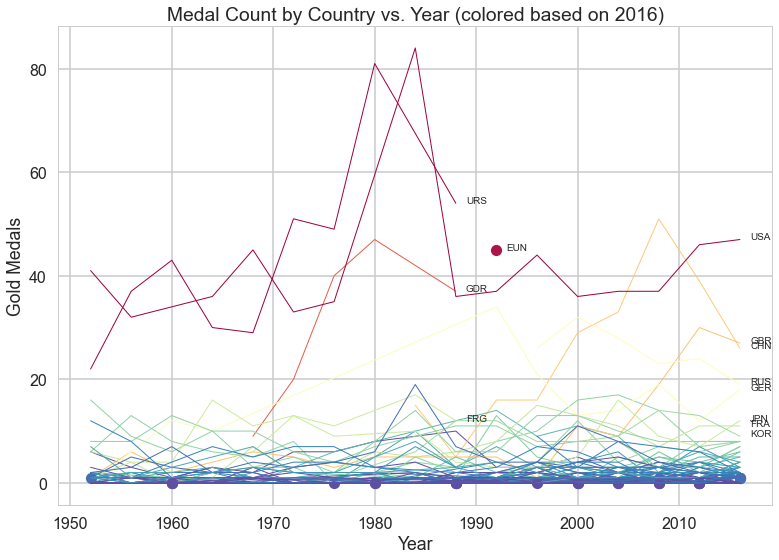

In [403]:
for country, dfi in sc[sc.Year >= 1950].groupby('NOC'):
    golds = dfi.Gold.values[-1]
    max_golds = sc[sc.Year == 2016].Gold.max()
    color = Spectral(1 - (golds / max_golds)**0.75)
    if len(dfi) > 1:
        plt.plot(dfi.Year, dfi.Gold, color=color, lw=1)
    else:
        plt.plot(dfi.Year, dfi.Gold, 'o', color=color, lw=1)
    
    if golds > 8:
        plt.text(dfi.Year.max()+1, golds, country)
# plt.yscale('log')
plt.title('Medal Count by Country vs. Year (colored based on 2016)')
plt.ylabel('Gold Medals')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

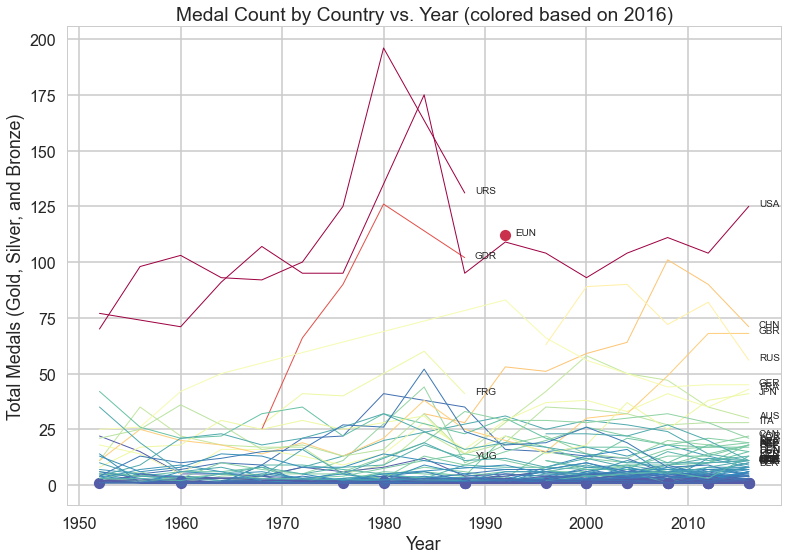

In [441]:
for country, dfi in sc[sc.Year >= 1950].groupby('NOC'):
    golds = dfi.Total.values[-1]
    max_golds = sc[sc.Year == 2016].Total.max()
    color = Spectral(1 - (golds / max_golds)**0.75)
    if len(dfi) > 1:
        plt.plot(dfi.Year, dfi.Total, color=color, lw=1)
    else:
        plt.plot(dfi.Year, dfi.Total, 'o', color=color, lw=1)
    
    if golds > 8:
        plt.text(dfi.Year.max()+1, golds, country)
# plt.yscale('log')
plt.title('Medal Count by Country vs. Year (colored based on 2016)')
plt.ylabel('Total Medals (Gold, Silver, and Bronze)')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

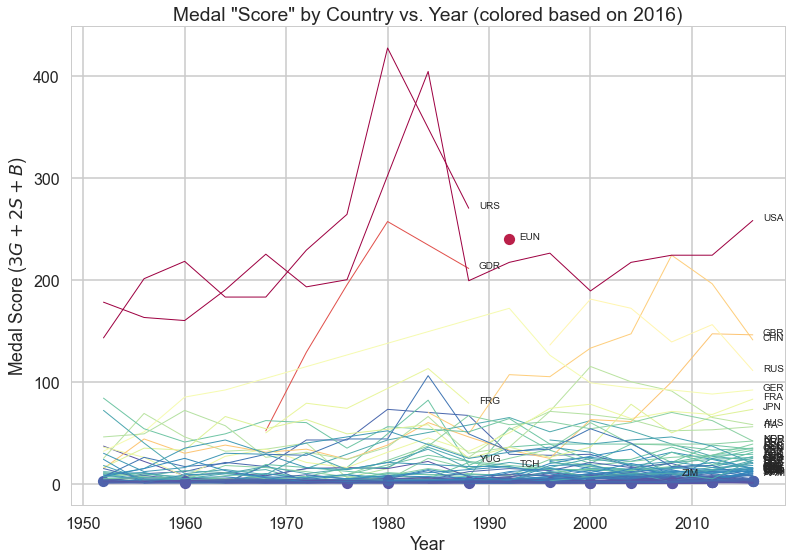

In [445]:
for country, dfi in sc[sc.Year >= 1950].groupby('NOC'):
    golds = dfi.Score.values[-1]
    max_golds = sc[sc.Year == 2016].Score.max()
    color = Spectral(1 - (golds / max_golds)**0.75)
    if len(dfi) > 1:
        plt.plot(dfi.Year, dfi.Score, color=color, lw=1)
    else:
        plt.plot(dfi.Year, dfi.Score, 'o', color=color, lw=1)
    
    if golds > 8:
        plt.text(dfi.Year.max()+1, golds, country)
# plt.yscale('log')
plt.title('Medal "Score" by Country vs. Year (colored based on 2016)')
plt.ylabel('Medal Score ($3G + 2S + B$)')
plt.xlabel('Year')

# Predicting Medal Count

Assumes number of medals is independent from other countries

In [522]:
sc

Medal,Year,Season,NOC,Bronze,Gold,Silver,Total,Score,Host,HomeField
0,1896,Summer,AUS,1,2,0,3,7,GRE,False
1,1896,Summer,AUT,2,2,1,5,10,GRE,False
2,1896,Summer,DEN,3,1,2,6,10,GRE,False
3,1896,Summer,FRA,2,5,4,11,25,GRE,False
4,1896,Summer,GBR,3,3,3,9,18,GRE,False
...,...,...,...,...,...,...,...,...,...,...
1652,2016,Summer,UKR,4,2,5,11,20,BRA,False
1653,2016,Summer,USA,39,47,39,125,258,BRA,False
1654,2016,Summer,UZB,7,4,2,13,23,BRA,False
1655,2016,Summer,VEN,2,0,1,3,4,BRA,False


In [526]:
medals_per_year = sc[['Year', 'Total']].groupby('Year').sum()

In [523]:
olympiads_ago = (2016 - sc.Year)/4
weight = 0.1**olympiads_ago

In [527]:
len(sc[sc.NOC=='USA'])

28

In [528]:
len(medals_per_year)

29

In [540]:
avg_medals_dict = {}
for country, dfi in sc.groupby('NOC'):
    if country not in defunct:
        olympiads_ago = (2016 - dfi.Year)/4
        weight = 0.1**olympiads_ago
        avg_count = (dfi.Total * weight).sum() / weight.sum()
        avg_medals_dict[country] = avg_count
    
avg_medals = pd.Series(avg_medals_dict).sort_values(ascending=False)

In [541]:
avg_medals.head(10)

USA    122.962014
CHN     72.972420
GBR     67.792656
RUS     58.517636
GER     44.996713
FRA     42.252481
JPN     40.580067
AUS     30.623625
ITA     27.995194
KOR     21.737810
dtype: float64

# Calculating Rank

In [406]:
n=3
top_by_year = {}
for year in sorted(sc[sc.Year > 1960].Year.unique()):
    df_top = sc[sc.Year==year].sort_values('Gold', ascending=False).head(n)
    top_by_year[year] = list(df_top['NOC'])

In [586]:
ranked_by_year = {}
for year in sorted(sc[sc.Year > 1960].Year.unique()):
    df_top = sc[sc.Year==year].sort_values('Gold', ascending=False)
    ranked_by_year[year] = list(df_top['NOC'])

In [587]:
top_by_year

{1964: ['USA', 'URS', 'JPN'],
 1968: ['USA', 'URS', 'JPN'],
 1972: ['URS', 'USA', 'GDR'],
 1976: ['URS', 'GDR', 'USA'],
 1980: ['URS', 'GDR', 'ITA'],
 1984: ['USA', 'ROU', 'FRG'],
 1988: ['URS', 'GDR', 'USA'],
 1992: ['EUN', 'USA', 'GER'],
 1996: ['USA', 'RUS', 'GER'],
 2000: ['USA', 'RUS', 'CHN'],
 2004: ['USA', 'CHN', 'RUS'],
 2008: ['CHN', 'USA', 'RUS'],
 2012: ['USA', 'CHN', 'GBR'],
 2016: ['USA', 'GBR', 'CHN']}

For plotting simplicity, let's focus on countries that have been in the top 3 in recent years

In [409]:
high_ranked = set()
for top in top_by_year.values():
    high_ranked.update(top)

In [410]:
high_ranked

{'CHN',
 'EUN',
 'FRG',
 'GBR',
 'GDR',
 'GER',
 'ITA',
 'JPN',
 'ROU',
 'RUS',
 'URS',
 'USA'}

(50.0, 0.0)

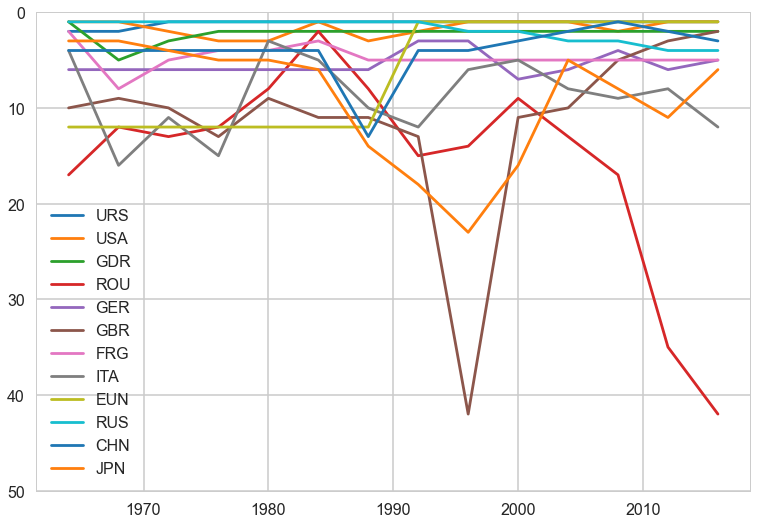

In [412]:
rank_list = []
for noc in high_ranked:
    years = []
    ranks = []
    
    for year, rankings in ranked_by_year.items():
        years.append(year)
        if noc in rankings:
            rank = rankings.index(noc) + 1

        ranks.append(rank)
        rank_list.append({'year': year, 'rank': rank, 'noc': noc})

    plt.plot(years, ranks, label=noc)
    
ranks_df = pd.DataFrame(rank_list)
plt.legend()
plt.ylim(50, 0)

In [413]:
rank_list = []
for noc in sorted(sc.NOC.unique()):
    years = []
    ranks = []
    
    for year, rankings in ranked_by_year.items():
        years.append(year)
        if noc in rankings:
            rank = rankings.index(noc) + 1

        ranks.append(rank)
        rank_list.append({'year': year, 'rank': rank, 'noc': noc})
    
ranks_df = pd.DataFrame(rank_list)

In [414]:
ranks_df = ranks_df.sort_values('year')
ranks_df

,year,rank,noc
0,1964,6,AFG
1652,1964,22,SUI
364,1964,25,CRC
1638,1964,54,SUD
378,1964,55,CRO
...,...,...,...
111,2016,66,AUT
615,2016,7,FRA
1707,2016,32,SWE
307,2016,58,CHI


## Weighting for Newness
 - Recent data is more relevant than old data
 - 0.5**(olympiads ago) is like saying each olympiad is progressively 1/2 as important as the one after in determining the next olympiad's results

In [551]:
olympiads_ago = (2016 - ranks_df.year)/4
weight = 0.5**olympiads_ago

In [552]:
weight

0      0.250000
1      0.500000
2      0.007812
3      0.003906
4      0.015625
         ...   
983    0.003906
984    0.031250
985    0.001953
986    0.125000
987    0.250000
Name: year, Length: 988, dtype: float64

In [553]:
ranks_df['weight'] = weight

In [554]:
weight_year = ranks_df[['year', 'weight']].drop_duplicates().sort_values('year')

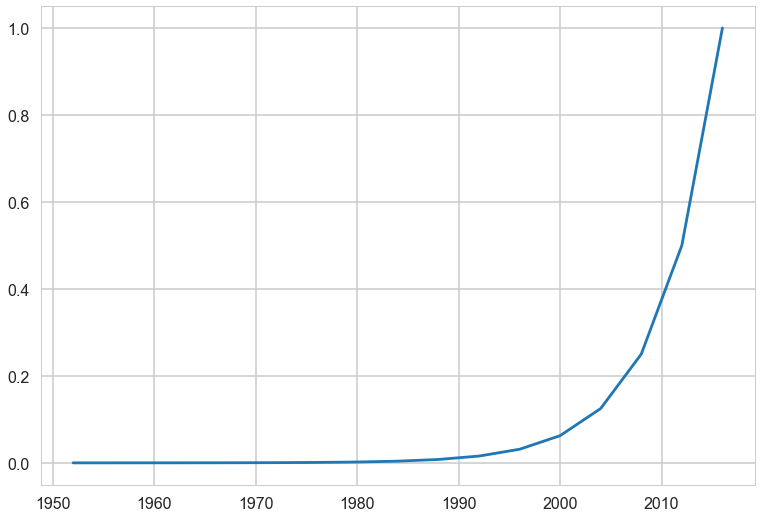

In [555]:
plt.plot(weight_year.year, weight_year.weight)

 - This ranking is polluted with defunct countries...

In [556]:
weighted_ranks = {}
recent = ranks_df.year > 1960
for noc, dfi in ranks_df[recent].groupby('noc'):
    weighted_rank = (dfi['rank'] * dfi['weight']).sum() / dfi['weight'].sum()
    weighted_ranks[noc] = weighted_rank

In [557]:
pd.Series(weighted_ranks).sort_values().head(10)

EUN    1.000000
URS    1.031579
USA    1.141993
GDR    2.106383
CHN    2.500978
RUS    3.714286
GBR    4.185558
FRG    4.400000
GER    5.204773
KOR    7.345696
dtype: float64

## Eliminating Defunct Countries...

Who is GDR?
 - East Germany

In [563]:
db[db.NOC == 'GDR'].Team.drop_duplicates()

676        East Germany
6043     East Germany-1
12418    East Germany-2
69718    East Germany-3
Name: Team, dtype: object

Who is EUN?
 - https://en.wikipedia.org/wiki/Unified_Team_at_the_Olympics
 - They won the 1992 summer olympics!
 - flawless record!

In [564]:
db[db.NOC == 'EUN'].Team.drop_duplicates()

620        Unified Team
17090    Unified Team-2
26204    Unified Team-1
84776    Unified Team-3
Name: Team, dtype: object

In [565]:
ranks_df[ranks_df.noc == 'EUN']

,year,rank,noc,weight
279,1992,1,EUN,0.015625


In [566]:
sc[sc.NOC == 'EUN']

Medal,Year,Season,NOC,Bronze,Gold,Silver,Total,Score,Host,HomeField
952,1992,Summer,EUN,29,45,38,112,240,ESP,False


In [567]:
db[db.NOC == 'FRG'].Team.drop_duplicates()

674        West Germany
10055    West Germany-2
12278    West Germany-1
96514    West Germany-3
Name: Team, dtype: object

Need algorithm for auto-removing defunct countries - those with no results in 2016

In [568]:
defunct = []
for noc in db.NOC.unique():
    if db[(db.Year == 2016) & (db.NOC == noc)].empty:
        defunct.append(noc)

In [569]:
defunct

['URS',
 'KUW',
 'UAR',
 'YAR',
 'EUN',
 'FRG',
 'GDR',
 'TCH',
 'AHO',
 'YMD',
 'ANZ',
 'SCG',
 'YUG',
 'MAL',
 'CRT',
 'SAA',
 'RHO',
 'BOH',
 'WIF',
 'NBO',
 'VNM',
 'UNK',
 'NFL']

In [570]:
for noc in defunct:
    if noc in weighted_ranks:
        del weighted_ranks[noc]

In [571]:
final_ranks = pd.Series(weighted_ranks).sort_values().head(10)
final_ranks

USA     1.141993
CHN     2.500978
RUS     3.714286
GBR     4.185558
GER     5.204773
KOR     7.345696
FRA     7.606604
JPN     8.141321
ITA    10.033327
AUS    10.070805
dtype: float64

## 3rd place medal count...

In [574]:
third_place = final_ranks.index[2]
third_place

'RUS'

In [575]:
avg_medals_dict[third_place]

58.51763551763552

## Attempt to make the prediction modular...
 - Idea is to cross-validate by predicting 2012 or 2016 to test algorithm effectiveness

In [431]:
def make_ranks_table(start_year=1896, stop_year=2016):
    
    ranked_by_year = {}
    for year in sorted(sc[sc.Year >= start_year].Year.unique()):
        df_top = sc[sc.Year==year].sort_values('Gold', ascending=False)
        ranked_by_year[year] = list(df_top['NOC'])
        
    rank_list = []
    for noc in sorted(sc.NOC.unique()):
        for year, rankings in ranked_by_year.items():
            if start_year <= year <= stop_year:
                if noc in rankings:
                    rank = rankings.index(noc) + 1
                    rank_list.append({'year': year, 'rank': rank, 'noc': noc})

    ranks_df = pd.DataFrame(rank_list)
    return ranks_df

In [432]:
def get_defunt_countries(year):
    most_recent_olympiad = sc[sc.Year <= year].Year.max()
    defunct = []
    for noc in db.NOC.unique():
        if db[(db.Year == most_recent_olympiad) & (db.NOC == noc)].empty:
            defunct.append(noc)
            
    return defunct

In [433]:
def predict_rank(pred_year=2020, cutoff_year=1960, weight_base=0.5):
    ranks_df = make_ranks_table(cutoff_year, pred_year-1)
    olympiads_ago = (pred_year - ranks_df.year)/4
    ranks_df['weight'] = weight_base**olympiads_ago
    
    weighted_ranks = {}
    for noc, dfi in ranks_df.groupby('noc'):
        if noc not in defunct:
            weighted_rank = (dfi['rank'] * dfi['weight']).sum() / dfi['weight'].sum()
            weighted_ranks[noc] = weighted_rank
            
    top = pd.Series(weighted_ranks).sort_values().head(10)
    return top

# Dank Rank Plots

 - Slope of lines and intersections indicate difficult to predict volatility in rankings
 - The fact that the spectral trend loosely holds shows that there are strong and weak countries in general

Text(0.5, 0, 'Year')

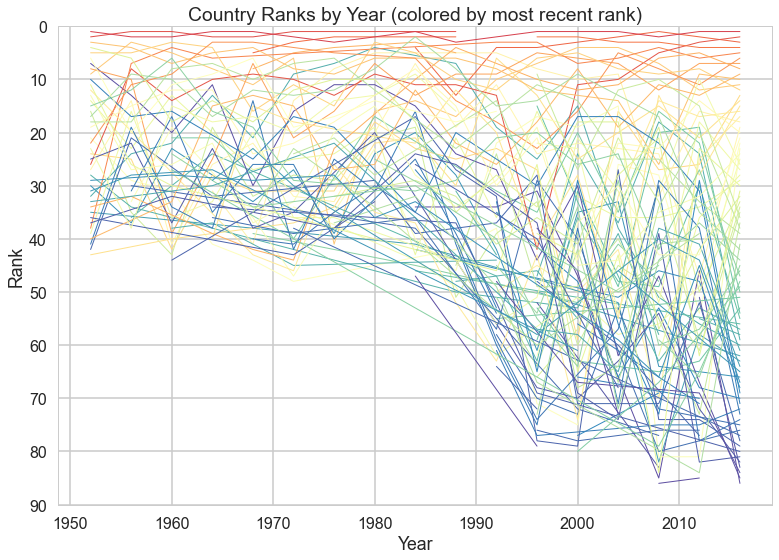

In [434]:
ranks_df = make_ranks_table(1950, 2020)

for noc, df_noc in ranks_df.groupby('noc'):
    try:
        last_year = df_noc['year'].values[-1]
        n = len(ranks_df[ranks_df.year == last_year]['rank'].unique())
        color = Spectral((df_noc['rank'].values[-1]/n)**0.5)
        plt.plot(df_noc['year'], df_noc['rank'], lw=1, color=color)
    except ValueError as e:
        print(df_noc)
        
plt.ylim(90, 0)
plt.title('Country Ranks by Year (colored by most recent rank)')
plt.ylabel('Rank')
plt.xlabel('Year')

In [435]:
predict_rank()

USA     1.142019
CHN     2.500978
RUS     3.714286
GBR     4.185858
GER     5.204736
KOR     7.345696
FRA     7.607562
JPN     8.141347
ITA    10.033113
AUS    10.070650
dtype: float64

I'm suspicious that I have a bug because China comes to 2.0 for a lot of different inputs, which is odd

In [436]:
predict_rank(2016, cutoff_year=1900, weight_base=0.5)

USA     1.284341
CHN     2.000000
RUS     3.419355
GER     5.413235
GBR     6.372248
KOR     6.691385
ITA     8.065934
FRA     8.215167
AUS     9.141132
JPN    10.287218
dtype: float64

# Debuts

## Sport Debuts

In [487]:
for event, year in db[(db.Season=='Summer')][['Sport', 'Year']].groupby('Sport')['Year'].min().sort_values(ascending=False).iteritems():
    print(f'{year}: {event}')

2016: Rugby Sevens
2000: Triathlon
2000: Trampolining
2000: Taekwondo
1996: Beach Volleyball
1996: Softball
1992: Badminton
1992: Baseball
1988: Table Tennis
1984: Synchronized Swimming
1984: Rhythmic Gymnastics
1964: Judo
1964: Volleyball
1936: Handball
1936: Aeronautics
1936: Basketball
1936: Canoeing
1932: Alpinism
1920: Ice Hockey
1912: Modern Pentathlon
1912: Art Competitions
1908: Figure Skating
1908: Racquets
1908: Hockey
1908: Jeu De Paume
1908: Motorboating
1904: Diving
1904: Boxing
1904: Roque
1904: Lacrosse
1900: Croquet
1900: Equestrianism
1900: Rowing
1900: Rugby
1900: Cricket
1900: Sailing
1900: Water Polo
1900: Archery
1900: Polo
1900: Golf
1900: Basque Pelota
1900: Football
1900: Tug-Of-War
1896: Fencing
1896: Weightlifting
1896: Swimming
1896: Athletics
1896: Tennis
1896: Gymnastics
1896: Shooting
1896: Cycling
1896: Wrestling


## Art!

In [550]:
db[db.Sport.str.contains('Art')][['Event', 'Year']].sort_values('Year').drop_duplicates('Event')

,Event,Year
57547,Art Competitions Mixed Music,1912
262198,Art Competitions Mixed Sculpturing,1912
192157,Art Competitions Mixed Literature,1912
162117,Art Competitions Mixed Architecture,1912
195730,Art Competitions Mixed Painting,1912
53724,"Art Competitions Mixed Music, Compositions For...",1928
92872,"Art Competitions Mixed Painting, Paintings",1928
201184,"Art Competitions Mixed Architecture, Designs F...",1928
121859,"Art Competitions Mixed Architecture, Architect...",1928
61412,"Art Competitions Mixed Literature, Epic Works",1928


## Aero!

In [542]:
db[db.Event.str.contains('Aero')].drop_duplicates()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214105,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold


## Event Debuts

In [483]:
for event, year in db[(db.Season=='Summer') & (db.Year > 1972)][['Event', 'Year']].groupby('Event')['Year'].min().sort_values(ascending=False).iteritems():
    print(f'{year}: {event}')

2016: Rugby Sevens Women's Rugby Sevens
2016: Wrestling Women's Light-Heavyweight, Freestyle
2016: Rugby Sevens Men's Rugby Sevens
2016: Golf Women's Individual
2016: Wrestling Women's Featherweight, Freestyle
2016: Golf Men's Individual
2016: Sailing Women's Skiff
2012: Sailing Men's Skiff
2012: Boxing Women's Middleweight
2012: Boxing Women's Flyweight
2012: Boxing Women's Lightweight
2012: Canoeing Men's Kayak Doubles, 200 metres
2012: Canoeing Men's Canadian Singles, 200 metres
2012: Cycling Women's Team Sprint
2012: Canoeing Men's Kayak Singles, 200 metres
2012: Cycling Women's Team Pursuit
2012: Cycling Women's Omnium
2012: Canoeing Women's Kayak Singles, 200 metres
2012: Cycling Women's Keirin
2012: Sailing Men's One Person Heavyweight Dinghy
2012: Cycling Men's Omnium
2012: Tennis Mixed Doubles
2008: Swimming Men's 10 kilometres Open Water
2008: Fencing Women's Sabre, Team
2008: Cycling Men's BMX
2008: Cycling Women's BMX
2008: Table Tennis Women's Team
2008: Table Tennis Men's